In [ ]:
# Hibrit Kuantum Transfer Learning 


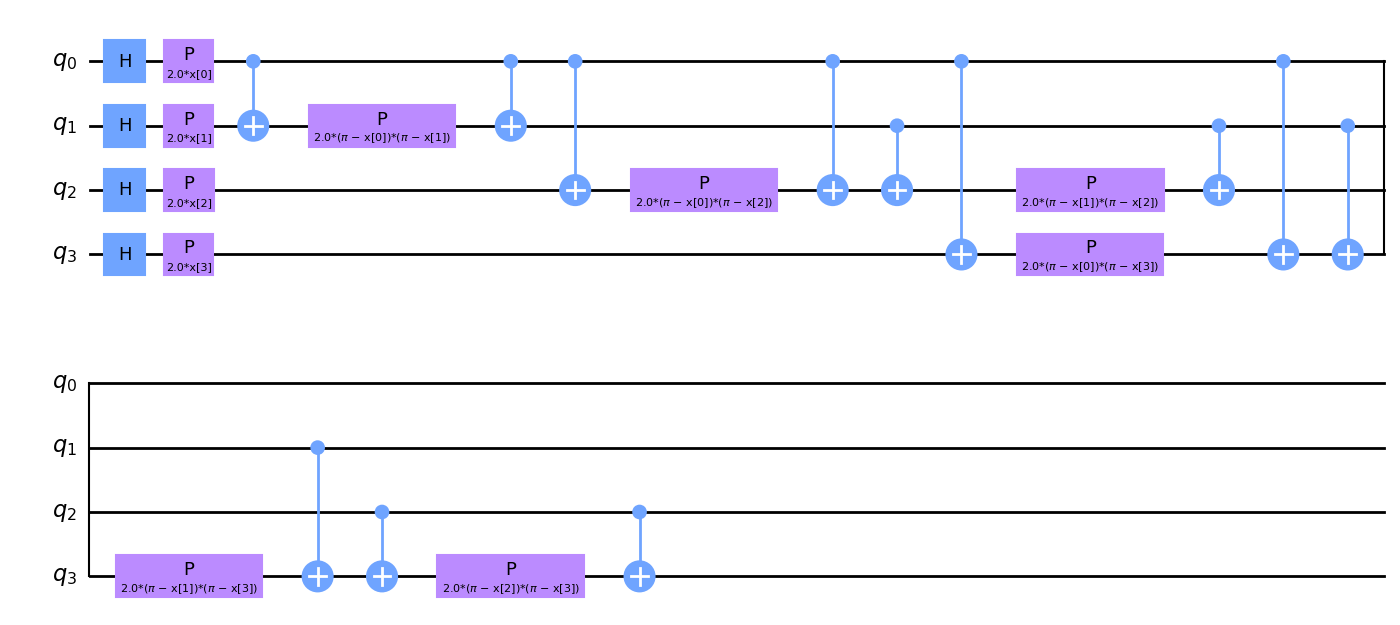

In [2]:
#Qiskit son versiyon ile bir kuantum makine öğrenmesi devre örneği:
from qiskit.circuit.library import ZZFeatureMap

num_qubits=4

feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

In [23]:
#PannyLane ile kuantum makine öğrenmesinde embedding katmanı devre örneği
#AmplitudeEmbedding'de normlizasyon yapılması gerek; Kuantum mekaniğinde durum vvektör boyutu 1 'e eşit olmalı.
#qml.AmplitudeEmbedding(inputs, wires=range(n_qubits),normalize=True)

import pennylane as qml
from pennylane import numpy as np
from pennylane import draw
dev = qml.device('default.qubit', wires=3)
@qml.qnode(dev)
def ircuit(features):
    qml.BasisEmbedding(features=features, wires=range(3))
    return qml.state()
sample_features = np.array([1, 0, 1])
drawn_circuit = draw(simple_circuit)(sample_features)
print(drawn_circuit)

0: ─╭|Ψ⟩─┤  State
1: ─├|Ψ⟩─┤  State
2: ─╰|Ψ⟩─┤  State


In [25]:
#Pannylane ile kuantum makine öğrenmesinde dolanıklılık katmanı ile devre örneği
@qml.qnode(dev, diff_method="adjoint")
def circuit(inputs, weights):
    qml.AmplitudeEmbedding(inputs, wires=range(n_qubits),normalize=True)
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]
    